Assignment on Clustering
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities

In this assignment, our objective is to Categorise/Cluster the countries using some socio-economic and health factors that determine the overall development of the country, then identify the under developed countries which the CEO of NGO needs to focus on the most to provide aid.



Steps:
i.Data Understanding and Cleaning
ii.Data Preparation: Outliers Removal, Scaling 
iii.Principal Component Analysis 
iv.k-means & Hierarchical Clustering
v.Visualization and inferences
vi.Conclusion

In [1]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler

## Data Understanding

In [3]:
#read dataset
country_df=pd.read_csv("C:/Users/asahu1/Downloads/Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#statistical information about Dataset
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#checking shape,columns,etc of dataset
print(country_df.shape)
print(country_df.columns)
print(country_df.info())

(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


In [6]:
#Check null
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


We do not find any null values in the dataset

## Converting exports, imports and health percentages to absolute values 

In [7]:

country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
country_df_new=country_df
country_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
country_df_new.shape

(167, 10)

## Data Preparation

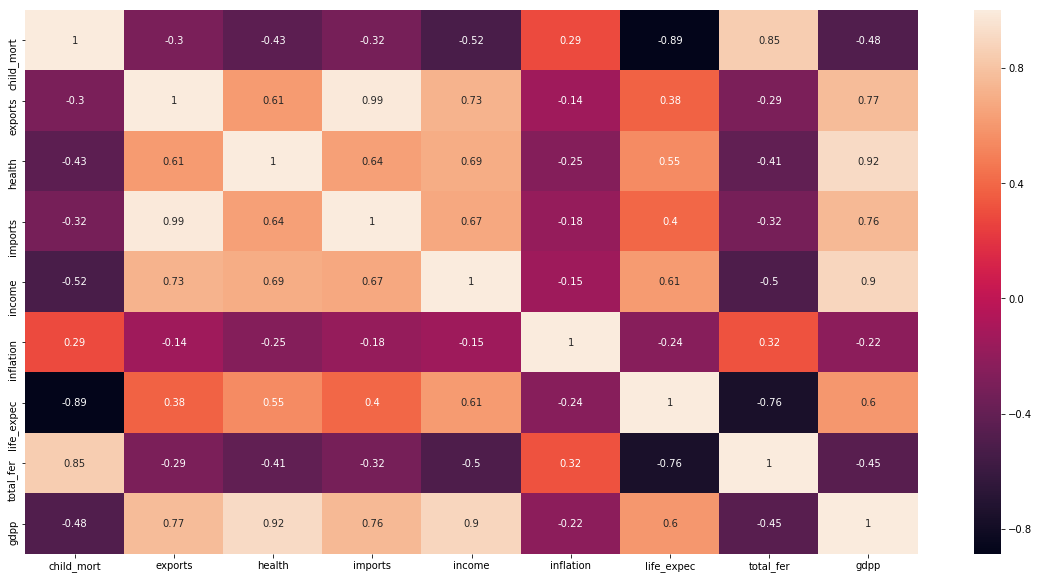

In [10]:
#First let us draw a heatmap to check if the features are correlated
plt.figure(figsize = (20,10))        
sns.heatmap(country_df.corr(),annot = True)

Feature  Income is highly positively correlated with  exports, gdpp, health, imports & life_expec 

In [11]:
#Dropping off the country column since in PCA we would only require the numberic values
ff=country_df["country"]
country_df1=country_df.drop(['country'],axis=1)
country_df1.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


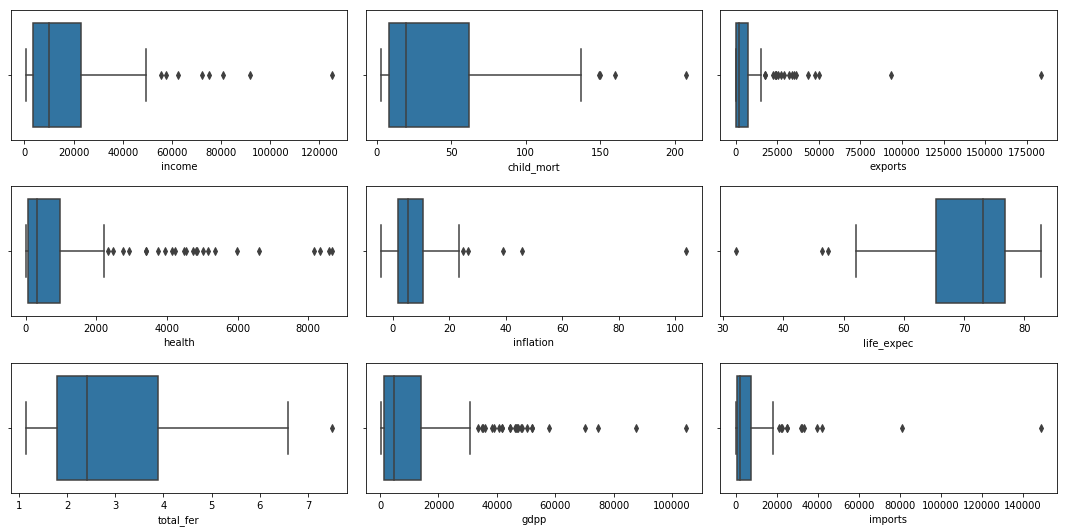

In [12]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1= sns.boxplot(country_df1['income'] ,ax = axs[0,0])
plt2= sns.boxplot(country_df1['child_mort'],ax = axs[0,1])
plt3= sns.boxplot(country_df1['exports'],ax = axs[0,2])
plt4= sns.boxplot(country_df1['health'],ax = axs[1,0])
plt5= sns.boxplot(country_df1['inflation'],ax = axs[1,1])
plt6= sns.boxplot(country_df1['life_expec'],ax = axs[1,2])
plt7= sns.boxplot(country_df1['total_fer'],ax = axs[2,0])
plt8= sns.boxplot(country_df1['gdpp'],ax = axs[2,1])
plt9= sns.boxplot(country_df1['imports'],ax = axs[2,2])
plt.tight_layout()

Developed Countries usually have very High income & gdpp, low inflation and child_mort and have high spenditure on health.
The NGO would not select a developed coutry for aid. Thus very high income values can be removed from the dataset without effeting the final inferences. also the objective of the study is to identify under developed countries 
Removing top 5% developed countries with respect to very high income.
Also we see that Nigeria has a high inflation and is also an outlier

In [13]:
#Removing Outliers

Q = country_df1.income.quantile(0.95)


country_df1= country_df1[~(country_df1.income > Q)]


In [14]:
country_df1.shape

(158, 9)

In [15]:
country_df1= country_df1[~(country_df1.inflation > 46)]

In [16]:
country_df1.shape

(157, 9)

In [17]:
#Removing Outliers of income column (with Country Column present in dataset)
Q = country_df_new.income.quantile(0.95)
country_df_new= country_df_new[~(country_df_new.income > Q)]


In [18]:
country_df_new.shape

(158, 10)

In [19]:
country_df_new= country_df_new[~(country_df_new.inflation > 46)]

In [20]:
country_df_new.shape

(157, 10)

In [21]:
df_country= country_df_new['country']

In [22]:
df_country= df_country.reset_index(drop=True)

df_country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [23]:
print(country_df_new.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [24]:

# Checking values at 25%,50%,75%,90%,95% and 99%

country_df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.500637,4793.872978,867.630026,4692.063580,13940.210191,7.242834,70.096178,2.995541,10326.012739
std,40.209825,7742.478871,1418.229105,6995.792009,12944.981404,7.574587,8.844779,1.516919,13723.344499
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,10.000000,425.226000,67.858000,562.020000,3280.000000,1.850000,64.600000,1.800000,1310.000000
50%,20.700000,1675.870000,278.481000,1831.950000,9860.000000,5.140000,72.100000,2.520000,4500.000000
75%,62.200000,5656.000000,827.970000,6052.000000,20100.000000,10.100000,76.400000,4.080000,12100.000000
90%,100.220000,12835.260000,3118.748000,12083.120000,36200.000000,16.600000,80.300000,5.322000,31960.000000
95%,116.000000,18778.440000,4574.856000,17796.540000,41160.000000,20.820000,81.320000,5.926000,44840.000000
99%,154.400000,34931.136000,5633.180000,32790.032000,45444.000000,32.088000,82.000000,6.567600,51988.000000


In [25]:
# Checking the percentage of missing values

round(100*(country_df1.isnull().sum()/len(country_df1.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

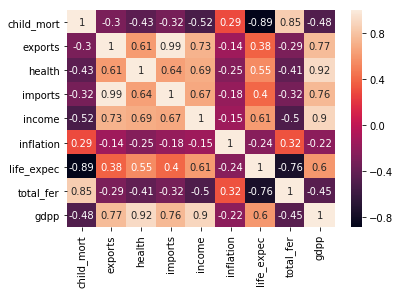

In [26]:
#checking correlation

sns.heatmap(country_df.corr(),annot = True)

## Standardisation of Features


In [27]:
# Normalizing numeric features

df = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [28]:
# Normalizing numeric features

normalized_df=(country_df1-country_df1.mean())/(country_df1.std())

normalized_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.260870,-0.612023,-0.582214,-0.635206,-0.952509,0.290071,-1.571117,1.861971,-0.712145
1,-0.569528,-0.471254,-0.422876,-0.386564,-0.309789,-0.363430,0.701411,-0.887023,-0.454409
2,-0.303424,-0.397965,-0.480633,-0.470515,-0.080356,1.169327,0.724023,-0.069576,-0.427448
3,1.977113,-0.335123,-0.540833,-0.454229,-0.621106,2.001055,-1.130178,2.086109,-0.495215
4,-0.726207,0.097789,-0.093053,0.356462,0.398594,-0.766092,0.757941,-0.570592,0.136555


In [29]:
normalized_df.shape

(157, 9)

In [30]:
X1= normalized_df

<Figure size 288x288 with 0 Axes>

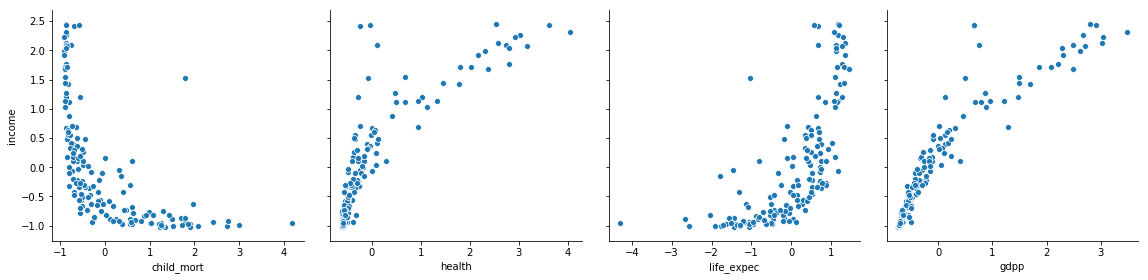

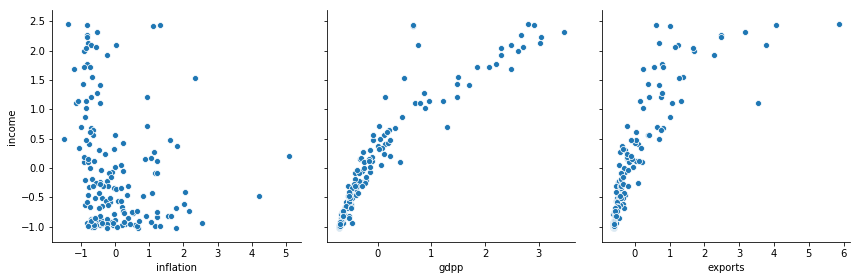

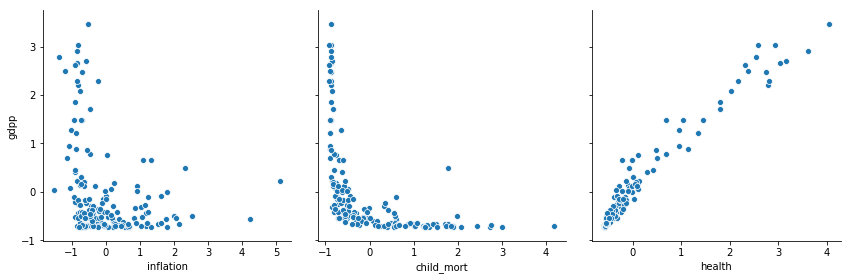

In [31]:
#  Making pairplot for all numeric values that we need

plt.figure(figsize=(4,4))
sns.pairplot(X1, x_vars=['child_mort','health','life_expec', 'gdpp'], y_vars='income',height=4, aspect=1,kind='scatter')

sns.pairplot(X1, x_vars=['inflation','gdpp','exports'], y_vars='income',height=4, aspect=1,kind='scatter')

sns.pairplot(X1, x_vars=['inflation','child_mort','health'], y_vars='gdpp',height=4, aspect=1,kind='scatter')

plt.show()

Its evident that countries having high income have high gdpp, low inflation, high exports, low child_mort, high life_expec and high spenditure on health. Thus these features are highly correlated.
PCA on Scaled Dataset
PCA derives the feature's Principle Components which are uncorrelated, orthogonal and cover maximum variance of data without actually loosing any data.

In [32]:
#Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [33]:
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [34]:
pca.components_

array([[-3.03595000e-01,  3.57248273e-01,  3.66327518e-01,
         3.65603757e-01,  3.83197718e-01, -1.64918851e-01,
         3.29683259e-01, -2.88937537e-01,  3.82265772e-01],
       [ 5.20552779e-01,  3.22225318e-01,  2.61603304e-01,
         2.90019631e-01,  8.80922029e-02,  8.15362030e-03,
        -4.00748534e-01,  5.03356102e-01,  2.25509431e-01],
       [-8.05079192e-02,  6.94970089e-02,  8.10487237e-03,
         6.23816403e-04,  1.67732269e-01,  9.72035392e-01,
         1.01286170e-01,  4.31887465e-02,  5.92578211e-02],
       [-7.36569894e-02,  5.15743693e-01, -4.73316465e-01,
         4.95836194e-01, -1.64605090e-01,  3.90865984e-02,
        -1.55380074e-01, -2.08670138e-01, -4.02979270e-01],
       [ 2.24360753e-01, -1.02377145e-01,  1.06014535e-01,
        -1.07366147e-01,  1.76520431e-01,  8.20009640e-02,
        -5.96497115e-01, -7.14971680e-01,  1.07413544e-01],
       [ 1.15838846e-01, -2.67094997e-03, -5.06085658e-01,
        -1.59897052e-01,  8.14572832e-01, -1.320200

In [35]:
#Let's check the variance ratios

pca.explained_variance_ratio_

array([0.65504522, 0.15893564, 0.09822415, 0.03683439, 0.02599365,
       0.01352207, 0.00952162, 0.00109122, 0.00083204])

Its evident that PC1 is covering 65% of variance(information) , PC2 is explaining 16% of variance in data , 10% is being covered by PC3 & about 4% by PC4.
Converting to Dataframe having features with PC values as different columns

In [36]:
pcs_df = pd.DataFrame({"Features":country_df1.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]})
pcs_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.303595,0.520553,-0.080508,-0.073657,0.224361,0.115839,0.748986,0.010547,-0.010052
1,exports,0.357248,0.322225,0.069497,0.515744,-0.102377,-0.002671,0.023626,-0.452682,0.530807
2,health,0.366328,0.261603,0.008105,-0.473316,0.106015,-0.506086,-0.030317,-0.453994,-0.314456
3,imports,0.365604,0.290020,0.000624,0.495836,-0.107366,-0.159897,0.038682,0.463948,-0.531536
4,income,0.383198,0.088092,0.167732,-0.164605,0.176520,0.814573,-0.084292,-0.148068,-0.257785
5,inflation,-0.164919,0.008154,0.972035,0.039087,0.082001,-0.132020,0.030984,0.027623,-0.021868
6,life_expec,0.329683,-0.400749,0.101286,-0.155380,-0.596497,0.025538,0.582777,-0.012830,0.007298
7,total_fer,-0.288938,0.503356,0.043189,-0.208670,-0.714972,0.141982,-0.291128,-0.002567,-0.040418
8,gdpp,0.382266,0.225509,0.059258,-0.402979,0.107414,-0.055815,-0.059978,0.592243,0.517796


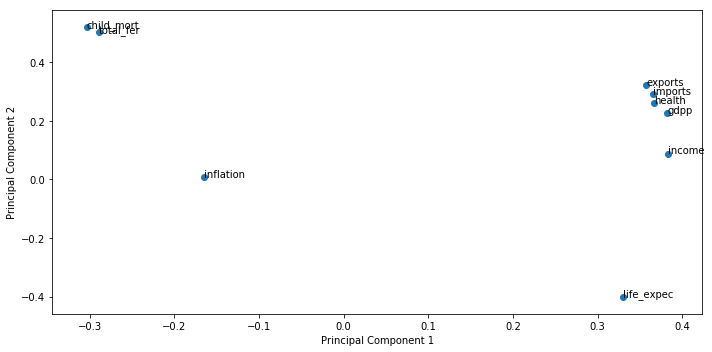

In [37]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

The above figure shows the Loadings: how the original variables are related to PCs. For features income, gdpp,health, life_expec, exports, imports PC1 is high & for features like inflation, child_mort, total_fer PC2 is higher.

## Using Scree plot to decide the number of PC

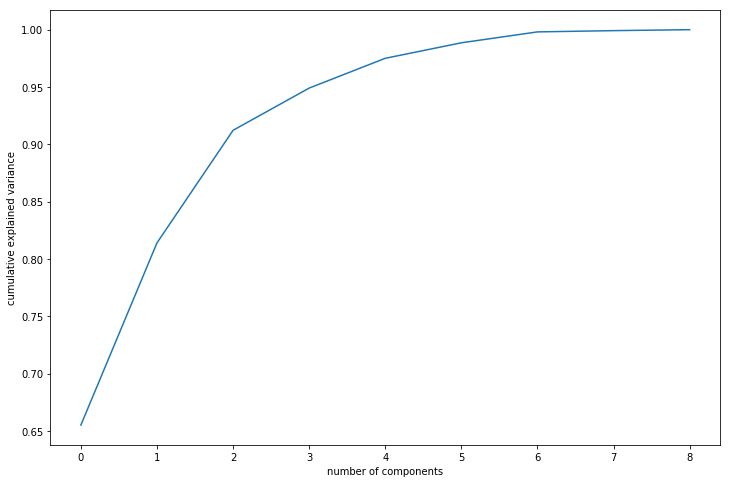

In [38]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see that 95% of the data is explained by 4 components. So choosing the number of PC's as 4

In [39]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=4)

In [40]:
df_pca = pca_final.fit_transform(X1)
df_pca.shape

(157, 4)

In [41]:
#take the transpose of the PC matrix so that we can create the new matrix

pc = np.transpose(df_pca)
pc

array([[-2.78781452e+00, -3.66847616e-02, -5.26433533e-01,
        -2.81684174e+00,  1.09765160e+00,  6.41587312e-02,
        -4.40879227e-01,  4.53281988e+00,  5.89733881e+00,
        -4.29325264e-01,  2.44400319e+00,  2.49052341e+00,
        -1.21079365e+00,  1.35545990e+00,  7.39619053e-02,
         6.55497020e+00, -3.39128564e-01, -2.44570086e+00,
        -7.92451765e-01, -1.14755539e+00,  2.88563992e-01,
        -9.83300612e-01,  2.39354491e-01,  4.85361266e-01,
        -2.87867786e+00, -2.95137612e+00, -1.31284235e+00,
        -2.50709990e+00,  4.95112561e+00, -5.37655446e-01,
        -3.31592861e+00, -3.26975704e+00,  9.86638624e-01,
        -1.90942583e-01, -1.33995792e-02, -2.07682227e+00,
        -3.35895724e+00, -2.16832105e+00,  5.53731478e-01,
        -2.65136257e+00,  1.25689426e+00,  3.63495853e+00,
         2.67557406e+00,  6.82825596e+00, -3.49985134e-01,
        -3.34429272e-01, -9.39160066e-01, -3.87371689e-01,
        -2.04942110e-01, -2.15879204e+00,  1.79240039e+0

In [42]:
#creating correlation matrix for the principal components

corrmat = np.corrcoef(df_pca.transpose())
pd.DataFrame(corrmat)

,0,1,2,3
0,1.000000,-0.000040,0.000068,-0.000027
1,-0.000040,1.000000,-0.000538,-0.000259
2,0.000068,-0.000538,1.000000,0.000591
3,-0.000027,-0.000259,0.000591,1.000000


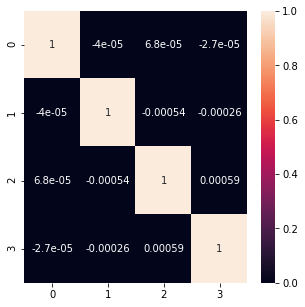

In [43]:
#plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(corrmat,annot = True)

In [44]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0005914648875041395 , min corr:  -0.0005382715126262216


In [45]:
#Let's create the newer matrix according to the given principal components

rownames = list(country_df_new['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.787815,1.445550,-0.144171,-0.124123
1,Albania,-0.036685,-1.531550,-0.389670,0.100797
2,Algeria,-0.526434,-0.967650,1.166996,-0.037223
3,Angola,-2.816842,2.001465,1.602102,-0.150577
4,Antigua and Barbuda,1.097652,-0.800706,-0.546978,0.190385


In [46]:
pcs_df2.shape

(157, 5)

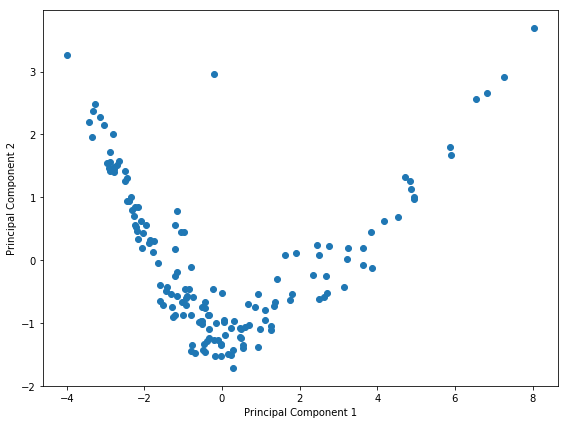

In [47]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Clustering

Hopkins Statistics

In [48]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
#Let's check the Hopkins measure

df1=pd.DataFrame(df_pca)
hopkins(df1)

0.8640718472444164

Since the Hopkins score >0.7 , we are good to go for clustering

Sum Of Squared Distances

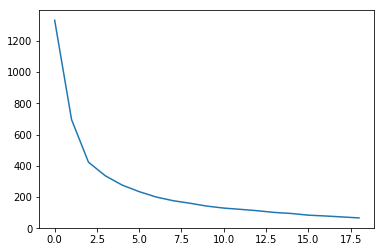

In [50]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

As per the elbow curve above the number of components can be taken as 4

## Silhoutte Analysis

In [51]:
#Let's check the silhouette score first to identify the optimum number of clusters

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

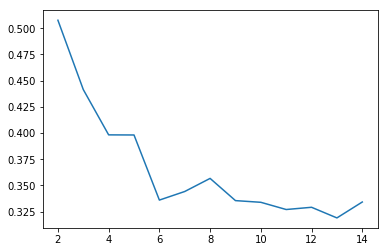

In [52]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the plot above we can verify about k being 4

## K-Means Clustering

In [53]:
model_clus = KMeans(n_clusters = 4, max_iter=50, init='k-means++', n_init= 10, tol=0.0001, random_state=50, algorithm='auto')
model_clus.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [54]:
df_pca_cluster_kmeans=pd.concat([df1,pd.Series(model_clus.labels_)], axis=1)
df_pca_cluster_kmeans.columns =['PC1','PC2','PC3','PC4','Cluster_Id']
df_pca_cluster_kmeans.head()

,PC1,PC2,PC3,PC4,Cluster_Id
0,-2.787815,1.445550,-0.144171,-0.124123,2
1,-0.036685,-1.531550,-0.389670,0.100797,1
2,-0.526434,-0.967650,1.166996,-0.037223,1
3,-2.816842,2.001465,1.602102,-0.150577,2
4,1.097652,-0.800706,-0.546978,0.190385,0


In [55]:
df_pca_cluster_kmeans['Cluster_Id'].value_counts()

1    73
2    45
0    26
3    13
Name: Cluster_Id, dtype: int64

In [56]:
#adding country column

df_pca_cluster_kmeans=pd.concat([df_pca_cluster_kmeans,pd.Series(df_country)],axis=1) 
df_pca_cluster_kmeans.head()

,PC1,PC2,PC3,PC4,Cluster_Id,country
0,-2.787815,1.445550,-0.144171,-0.124123,2,Afghanistan
1,-0.036685,-1.531550,-0.389670,0.100797,1,Albania
2,-0.526434,-0.967650,1.166996,-0.037223,1,Algeria
3,-2.816842,2.001465,1.602102,-0.150577,2,Angola
4,1.097652,-0.800706,-0.546978,0.190385,0,Antigua and Barbuda


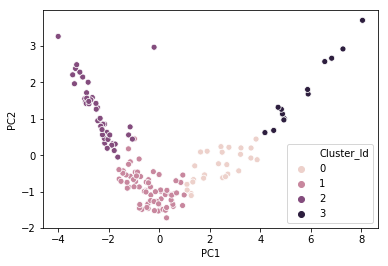

In [57]:
sns.scatterplot(x= 'PC1', y='PC2', hue='Cluster_Id', legend= 'full', data= df_pca_cluster_kmeans)

In [58]:
df_pca_cluster_kmeans.shape

(157, 6)

In [59]:
final_df_kmeans=df_pca_cluster_kmeans.merge(country_df_new,how='left',left_on='country',right_on='country')
final_df_kmeans.head()

,PC1,PC2,PC3,PC4,Cluster_Id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.787815,1.445550,-0.144171,-0.124123,2,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,-0.036685,-1.531550,-0.389670,0.100797,1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,-0.526434,-0.967650,1.166996,-0.037223,1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,-2.816842,2.001465,1.602102,-0.150577,2,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,1.097652,-0.800706,-0.546978,0.190385,0,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [60]:
final_df_kmeans.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country', 'child_mort',
       'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [61]:
kmeans_clusters_exports = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).exports.mean())
kmeans_clusters_child_mort = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).child_mort.mean())
kmeans_clusters_health = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).health.mean())
kmeans_clusters_imports = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).imports.mean())
kmeans_clusters_income = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).income.mean())
kmeans_clusters_inflation = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).inflation.mean())
kmeans_clusters_life_expec = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).life_expec.mean())
kmeans_clusters_total_fer = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).total_fer.mean())
kmeans_clusters_gdpp = pd.DataFrame(final_df_kmeans.groupby(["Cluster_Id"]).gdpp.mean())
dfa= pd.concat([pd.Series([0,1,2,3]), kmeans_clusters_exports, kmeans_clusters_child_mort, kmeans_clusters_health,kmeans_clusters_imports,kmeans_clusters_income,kmeans_clusters_inflation,kmeans_clusters_life_expec,kmeans_clusters_total_fer,kmeans_clusters_gdpp], axis=1)
dfa.columns = ["ClusterID", "exports_mean", "child_mort_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
dfa.head()

,ClusterID,exports_mean,child_mort_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,9592.357692,6.950000,1780.606154,9565.680769,28492.307692,2.143077,77.653846,1.773846,22296.153846
1,1,1962.815048,24.482192,328.330964,2149.032481,10454.657534,8.480945,72.297260,2.389589,5092.082192
2,2,823.643533,92.842222,99.729193,766.664689,3464.955556,9.827000,59.082222,5.029778,1743.600000
3,3,24837.484615,4.292308,4728.167692,22812.846154,40669.230769,1.544692,80.746154,1.800000,45484.615385


In [62]:
# Binning 

fin= country_df[country_df['income'] < 10454]

fin= fin[fin['child_mort'] > 24]


fin= fin[fin['health'] < 328]

Binning on Original Dataset based on the clusters mean for features where the variation is maximum from one cluster to other cluster based on objective of analysis. As we want to choose the countries which have very low income,high child_mort & very low spenditure on health.
This justifies the list of under developed countries which are dire need of help.

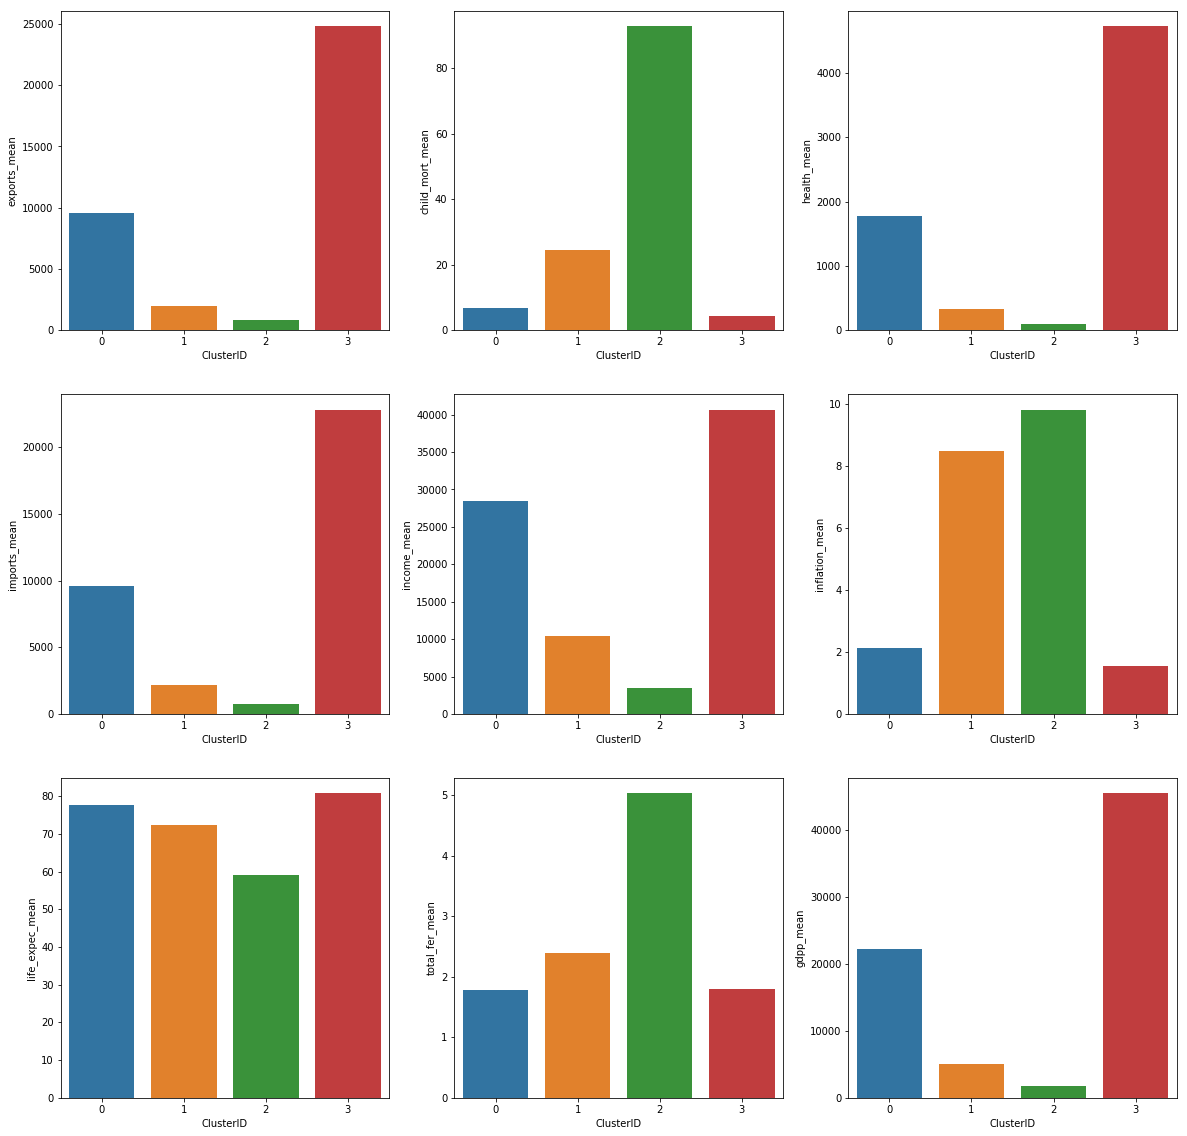

<Figure size 1080x1080 with 0 Axes>

In [63]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(331)
sns.barplot(x=dfa.ClusterID,y=dfa.exports_mean)
plt.subplot(332)
sns.barplot(x=dfa.ClusterID,y=dfa.child_mort_mean)
plt.subplot(333)
sns.barplot(x=dfa.ClusterID,y=dfa.health_mean)
plt.subplot(334)
sns.barplot(x=dfa.ClusterID,y=dfa.imports_mean)
plt.subplot(335)
sns.barplot(x=dfa.ClusterID,y=dfa.income_mean)
plt.subplot(336)
sns.barplot(x=dfa.ClusterID,y=dfa.inflation_mean)
plt.subplot(337)
sns.barplot(x=dfa.ClusterID,y=dfa.life_expec_mean)
plt.subplot(338)
sns.barplot(x=dfa.ClusterID,y=dfa.total_fer_mean)
plt.subplot(339)
sns.barplot(x=dfa.ClusterID,y=dfa.gdpp_mean)
plt.figure(figsize=(15,15))
plt.savefig('abc1.png')


In [64]:
dkmeans1= df_pca_cluster_kmeans.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dkmeans1= dkmeans1[dkmeans1['Cluster_Id'] == 0]
dkmeans1['income']= final_df_kmeans['income']
dkmeans1['gdpp']= final_df_kmeans['gdpp']
dkmeans1['child_mort']= final_df_kmeans['child_mort']
dkmeans1['health']= final_df_kmeans['health']
dkmeans1.head()


,Cluster_Id,country,income,gdpp,child_mort,health
4,0,Antigua and Barbuda,19100,12200,10.3,735.66
10,0,Bahamas,22900,28000,13.8,2209.20
11,0,Bahrain,41100,20700,8.6,1028.79
13,0,Barbados,15300,16000,14.2,1275.20
40,0,Croatia,20100,13500,5.5,1047.60


In [65]:
df_pca_cluster_kmeans[df_pca_cluster_kmeans.Cluster_Id==2].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

In [66]:
dkmeans2= df_pca_cluster_kmeans.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dkmeans2= dkmeans2[dkmeans2['Cluster_Id'] == 1]
dkmeans2['income']= final_df_kmeans['income']
dkmeans2['gdpp']= final_df_kmeans['gdpp']
dkmeans2['child_mort']= final_df_kmeans['child_mort']
dkmeans2.head()

,Cluster_Id,country,income,gdpp,child_mort
1,1,Albania,9930,4090,16.6
2,1,Algeria,12900,4460,27.3
5,1,Argentina,18700,10300,14.5
6,1,Armenia,6700,3220,18.1
9,1,Azerbaijan,16000,5840,39.2


In [67]:
dkmeans3= df_pca_cluster_kmeans.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dkmeans3= dkmeans3[dkmeans3['Cluster_Id'] ==2]
dkmeans3['income']= final_df_kmeans['income']

dkmeans3['gdpp']= final_df_kmeans['gdpp']
dkmeans3['child_mort']= final_df_kmeans['child_mort']
dkmeans3['health']= final_df_kmeans['health']

dkmeans3.head()


,Cluster_Id,country,income,gdpp,child_mort,health
0,2,Afghanistan,1610,553,90.2,41.9174
3,2,Angola,5900,3530,119.0,100.6050
17,2,Benin,1820,758,111.0,31.0780
24,2,Burkina Faso,1430,575,116.0,38.7550
25,2,Burundi,764,231,93.6,26.7960


In [68]:
dkmeans3.shape

(45, 6)

In [69]:
dkmeans3= dkmeans3.sort_values(by='child_mort', ascending=False)
dkmeans3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
65,2,Haiti,1500,662,208.0,45.7442
126,2,Sierra Leone,1220,399,160.0,52.2690
31,2,Chad,1930,897,150.0,40.6341
30,2,Central African Republic,888,446,149.0,17.7508
94,2,Mali,1870,708,137.0,35.2584
109,2,Niger,814,348,123.0,17.9568
3,2,Angola,5900,3530,119.0,100.6050
24,2,Burkina Faso,1430,575,116.0,38.7550
36,2,"Congo, Dem. Rep.",609,334,116.0,26.4194
63,2,Guinea-Bissau,1390,547,114.0,46.4950


In [70]:
dkmeans3= dkmeans3.sort_values(by='income', ascending=True)
dkmeans3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
36,2,"Congo, Dem. Rep.",609,334,116.0,26.4194
86,2,Liberia,700,327,89.3,38.5860
25,2,Burundi,764,231,93.6,26.7960
109,2,Niger,814,348,123.0,17.9568
30,2,Central African Republic,888,446,149.0,17.7508
103,2,Mozambique,918,419,101.0,21.8299
91,2,Malawi,1030,459,90.5,30.2481
62,2,Guinea,1190,648,109.0,31.9464
142,2,Togo,1210,488,90.3,37.3320
126,2,Sierra Leone,1220,399,160.0,52.2690


In [71]:
dkmeans3= dkmeans3.sort_values(by='health', ascending=True)
dkmeans3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
49,2,Eritrea,1420,482,55.2,12.8212
90,2,Madagascar,1390,413,62.2,15.5701
30,2,Central African Republic,888,446,149.0,17.7508
109,2,Niger,814,348,123.0,17.9568
103,2,Mozambique,918,419,101.0,21.8299
111,2,Pakistan,4280,1040,92.1,22.8800
36,2,"Congo, Dem. Rep.",609,334,116.0,26.4194
25,2,Burundi,764,231,93.6,26.7960
91,2,Malawi,1030,459,90.5,30.2481
17,2,Benin,1820,758,111.0,31.0780


In [72]:
dkmeans3= dkmeans3.sort_values(by=['gdpp','income','health'], ascending=True)
dkmeans3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
25,2,Burundi,764,231,93.6,26.7960
86,2,Liberia,700,327,89.3,38.5860
36,2,"Congo, Dem. Rep.",609,334,116.0,26.4194
109,2,Niger,814,348,123.0,17.9568
126,2,Sierra Leone,1220,399,160.0,52.2690
90,2,Madagascar,1390,413,62.2,15.5701
103,2,Mozambique,918,419,101.0,21.8299
30,2,Central African Republic,888,446,149.0,17.7508
91,2,Malawi,1030,459,90.5,30.2481
49,2,Eritrea,1420,482,55.2,12.8212


In [73]:
dkmeans4= df_pca_cluster_kmeans.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dkmeans4= dkmeans4[dkmeans4['Cluster_Id'] == 3]
dkmeans4['income']= final_df_kmeans['income']
dkmeans4['gdpp']= final_df_kmeans['gdpp']
dkmeans4['child_mort']= final_df_kmeans['child_mort']
dkmeans4.head()

,Cluster_Id,country,income,gdpp,child_mort
7,3,Australia,41400,51900,4.8
8,3,Austria,43200,46900,4.3
15,3,Belgium,41100,44400,4.5
28,3,Canada,40700,47400,5.6
43,3,Denmark,44000,58000,4.1


#  most under developed  countries : Cluster 3 with  Id: 2  

# As can be seen we have also seen the countries with respect to income, health, child mortality , GDP , etc.

## Thus the under developed countries like Congo, Dem. Rep., Niger , Central African Republic, Haiti , Sierra Leone,Mozambique, Liberia, Burundi, Eritrea, Madagascar etc. could be the best choice for  Help NGO to provide aid.

# Hierarchical Clustering

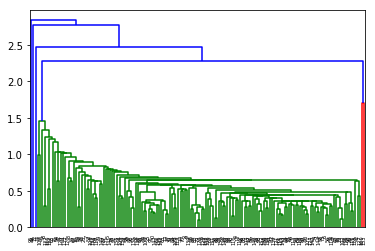

In [74]:
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()


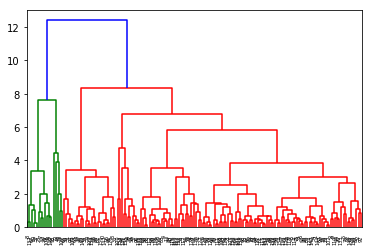

In [75]:
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [76]:
drop_clus = final_df_kmeans.drop(["Cluster_Id"] ,axis=1, inplace = True)
drop_clus

In [77]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
hc = pd.concat([final_df_kmeans, clusterCut], axis=1)
hc.columns = ['PC1', 'PC2', 'PC3','PC4','Country', 'child_mort', 'exports',
     'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
     'gdpp','ClusterID']


In [78]:
hc.head()

,PC1,PC2,PC3,PC4,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.787815,1.445550,-0.144171,-0.124123,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,-0.036685,-1.531550,-0.389670,0.100797,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,-0.526434,-0.967650,1.166996,-0.037223,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,-2.816842,2.001465,1.602102,-0.150577,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,1.097652,-0.800706,-0.546978,0.190385,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


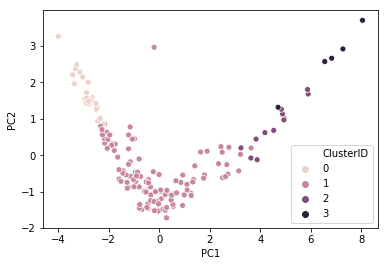

In [79]:
sns.scatterplot(x= 'PC1', y='PC2', hue='ClusterID', legend= 'full', data= hc)

In [80]:
dhcluster1= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dhcluster1= dhcluster1[dhcluster1['ClusterID'] == 0]
dhcluster1.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
24,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
25,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
27,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
30,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
31,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
36,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
39,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,0


In [81]:
dhcluster2= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dhcluster2= dhcluster2[dhcluster2['ClusterID'] == 1]
dhcluster2.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.200,267.8950,1987.740,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,1712.640,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,669.760,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
9,Azerbaijan,39.2,3171.120,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1
10,Bahamas,13.8,9800.000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,14386.500,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,1
12,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758,1
13,Barbados,14.2,6320.000,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,1


In [82]:
dhcluster3= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dhcluster3= dhcluster3[dhcluster3['ClusterID'] == 2]
dhcluster3.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
28,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2
52,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
53,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2
57,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2
67,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,2
74,Italy,4.0,9021.6,3411.74,9737.6,36200,0.319,81.7,1.46,35800,2
76,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500,2
108,New Zealand,6.2,10211.1,3403.70,9436.0,32300,3.730,80.9,2.17,33700,2


In [83]:
dhcluster4= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dhcluster4= dhcluster4[dhcluster4['ClusterID'] == 3]
dhcluster4.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,3
43,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,3
72,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,3
95,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,3
107,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300,3


In [84]:
dhcluster1.shape

(25, 11)

In [85]:
dhcluster2.shape

(115, 11)

In [86]:
dhcluster3.shape

(12, 11)

In [87]:
dhcluster4.shape

(5, 11)

In [88]:
hier_clus_clusters_exports = pd.DataFrame(hc.groupby(["ClusterID"]).exports.mean())
hier_clus_clusters_child_mort = pd.DataFrame(hc.groupby(["ClusterID"]).child_mort.mean())
hier_clus_clusters_health = pd.DataFrame(hc.groupby(["ClusterID"]).health.mean())
hier_clus_clusters_imports = pd.DataFrame(hc.groupby(["ClusterID"]).imports.mean())
hier_clus_clusters_income = pd.DataFrame(hc.groupby(["ClusterID"]).income.mean())
hier_clus_clusters_inflation = pd.DataFrame(hc.groupby(["ClusterID"]).inflation.mean())
hier_clus_clusters_life_expec = pd.DataFrame(hc.groupby(["ClusterID"]).life_expec.mean())
hier_clus_clusters_total_fer = pd.DataFrame(hc.groupby(["ClusterID"]).total_fer.mean())
hier_clus_clusters_gdpp = pd.DataFrame(hc.groupby(["ClusterID"]).gdpp.mean())
dfa_hc= pd.concat([pd.Series([0,1,2,3]), hier_clus_clusters_exports, hier_clus_clusters_child_mort, hier_clus_clusters_health,hier_clus_clusters_imports,hier_clus_clusters_income,hier_clus_clusters_inflation,hier_clus_clusters_life_expec,hier_clus_clusters_total_fer,hier_clus_clusters_gdpp], axis=1)
dfa_hc.columns = ["ClusterID", "exports2", "child_mort2", "health2","imports2","income2","inflation2","life_expec2","total_fer2","gdpp2"]
dfa_hc.head()

,ClusterID,exports2,child_mort2,health2,imports2,income2,inflation2,life_expec2,total_fer2,gdpp2
0,0,261.684288,112.076000,46.285040,340.107600,1723.720000,8.226600,55.800000,5.516000,773.920000
1,1,3359.401307,28.915652,511.357897,3429.369496,12837.565217,7.892696,71.606087,2.626609,7457.704348
2,2,14824.433333,4.191667,4383.787500,14059.058333,38716.666667,1.436833,81.208333,1.784167,43475.000000
3,3,36374.320000,4.820000,4729.836000,33013.020000,40920.000000,1.311600,80.180000,1.786000,44500.000000


<Figure size 1080x1080 with 0 Axes>

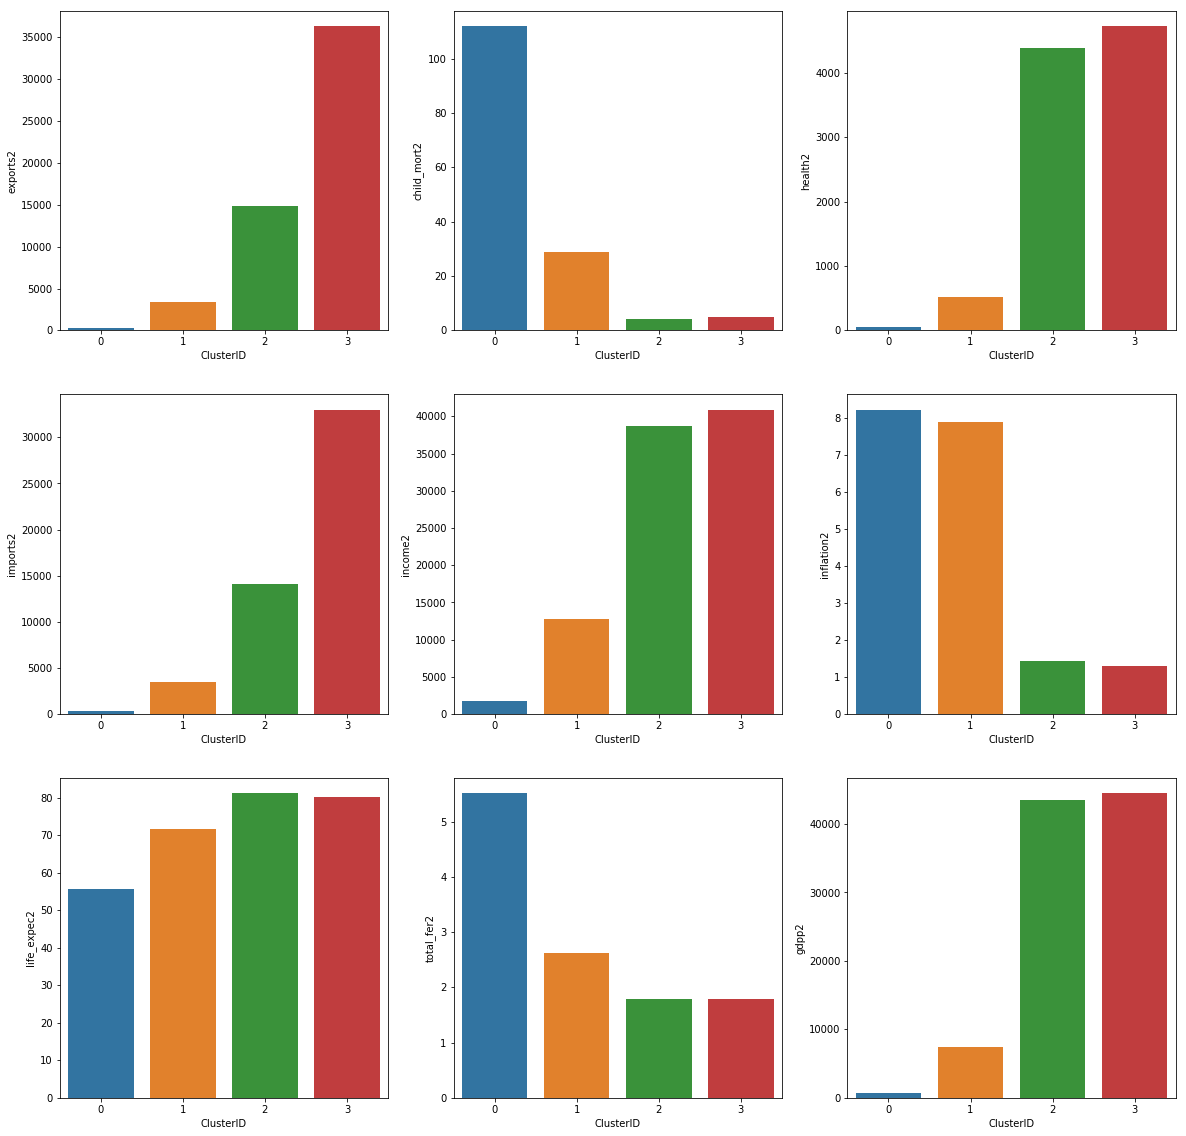

<Figure size 1080x1080 with 0 Axes>

In [89]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(331)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.exports2)
plt.subplot(332)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.child_mort2)
plt.subplot(333)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.health2)
plt.subplot(334)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.imports2)
plt.subplot(335)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.income2)
plt.subplot(336)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.inflation2)
plt.subplot(337)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.life_expec2)
plt.subplot(338)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.total_fer2)
plt.subplot(339)
sns.barplot(x=dfa_hc.ClusterID,y=dfa_hc.gdpp2)
plt.figure(figsize=(15,15))


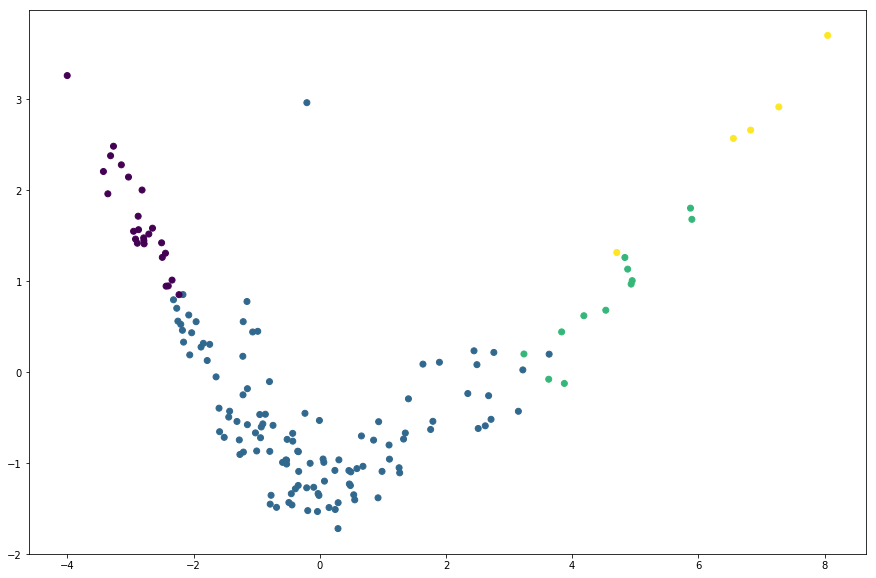

In [90]:
#Checking as to how PC1 and PC2 are related to different countries
plt.figure(figsize=(15,10))
plt.scatter(hc.PC1,hc.PC2,c=hc.ClusterID)

In [91]:
hc[hc.ClusterID==0].Country.values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

In [92]:
hc[hc.ClusterID==0].sort_values(by=['gdpp','income','health'])

,PC1,PC2,PC3,PC4,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,-2.951376,1.548103,0.236362,-0.179361,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
86,-2.401710,0.947536,-0.635920,-0.093253,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,0
36,-3.358957,1.959900,1.283624,-0.205680,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
109,-3.145049,2.278292,-1.014818,-0.432767,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0
126,-3.429221,2.205035,0.656286,-0.149829,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0
103,-2.872801,1.565535,-0.437275,-0.079629,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0
30,-3.315929,2.378196,-1.361107,-0.072478,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
91,-2.891594,1.416992,0.131274,0.001877,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0
142,-2.341363,1.011731,-1.210011,-0.069591,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488,0
63,-2.709716,1.517862,-1.061747,-0.107394,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,0



### Cluster2  with Id:1  contains 115 countries with wide range of income, gdpp, health, inflation etc.

###  Cluster 1 with Cluster_id: 0 includes set of under developed countries. These countries have very low income & gdpp, low expenditure on health &  high rate of child_mort.  

### Countries for help from NGO: Congo, Dem. Rep., Niger , Central African Republic, Haiti , Sierra Leone,Mozambique, Liberia, Burundi etc. 

### The final list of countries that are in dire need of money depending upon the data for the different variables in the dataset are as follows:

Afghanistan, Angola, Benin, Burkina Faso, Burundi, Central African Republic, Chad, Congo Dem. Rep, Gambia, Guinea, Guinea-Bissau, Haiti, Lesotho, Liberia, Malawi, Mali, Mozambique, Niger, Rwanda, Sierra Leone, Tanzania, Togo, Uganda, Zambia


